In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95% }</style>"))


import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import collections as co
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
import optuna

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer


from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import layers

pd.set_option("display.width", 100)
pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:.3f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95% }</style>"))

C:\Users\GUSTAVO\AppData\Local\Temp\ipykernel_2560\2791770535.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
name = r"Bank Customer Churn Prediction.csv"
df = pd.read_csv(name, sep=",")

In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,15647311,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,15619304,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,15701354,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,15737888,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,15569892,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,15584532,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,15682355,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [4]:
del df["customer_id"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
df.groupby("tenure").size()

tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
dtype: int64

In [8]:
df.groupby("products_number").size()

products_number
1    5084
2    4590
3     266
4      60
dtype: int64

In [9]:
df.groupby("credit_card").size()

credit_card
0    2945
1    7055
dtype: int64

In [73]:
df.groupby("active_member").size()

active_member
0    4849
1    5151
dtype: int64

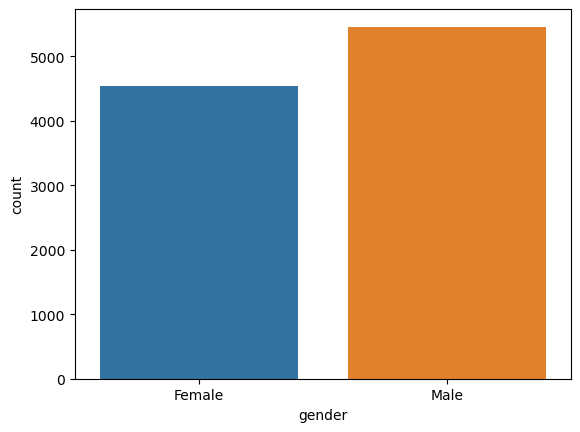

In [74]:
sns.countplot(x=df.gender)
plt.show()

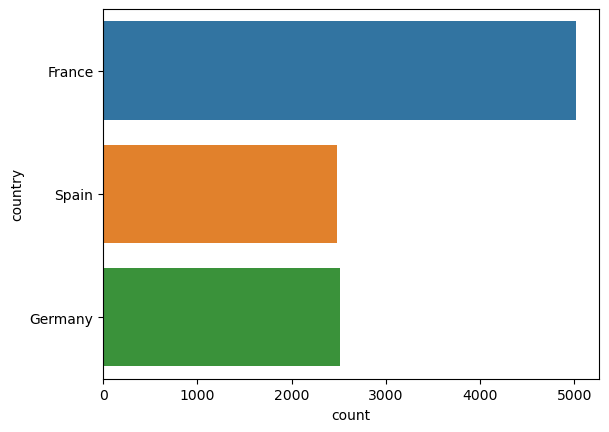

In [75]:
sns.countplot(y=df.country)
plt.show()

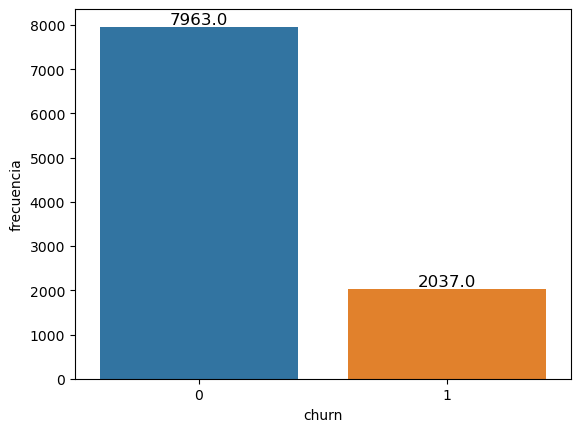

In [49]:
ax = sns.countplot(x=df.churn)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel("churn")
plt.ylabel("frecuencia") 
plt.show()

Nuestra Variable Objetivo está desbalanceada.

In [15]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


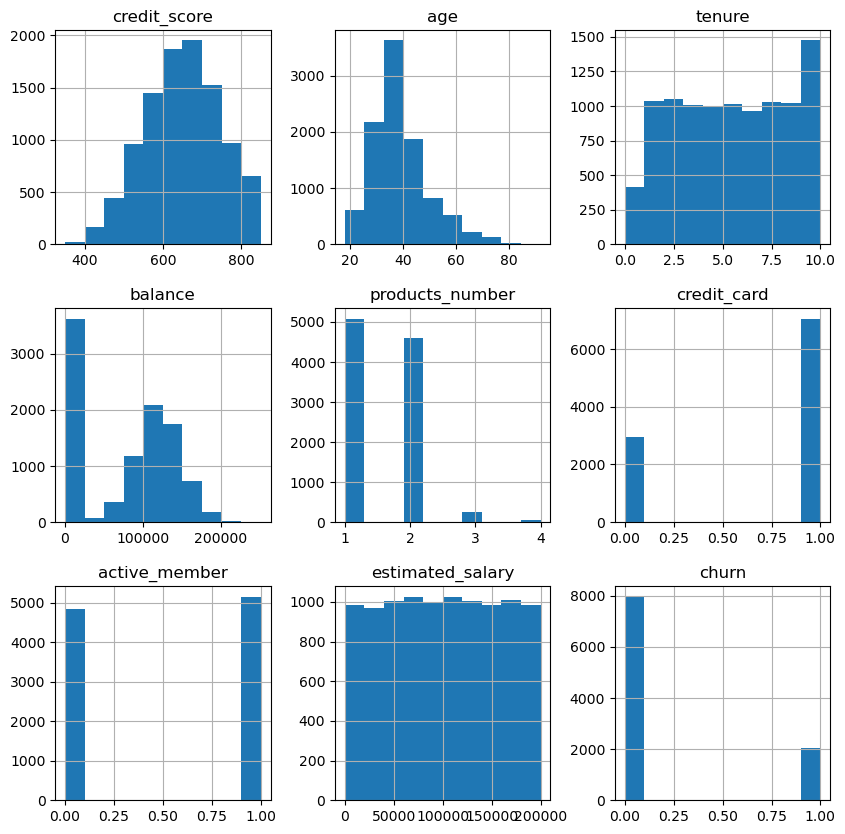

In [16]:
%matplotlib inline
# Univariate Histograms
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

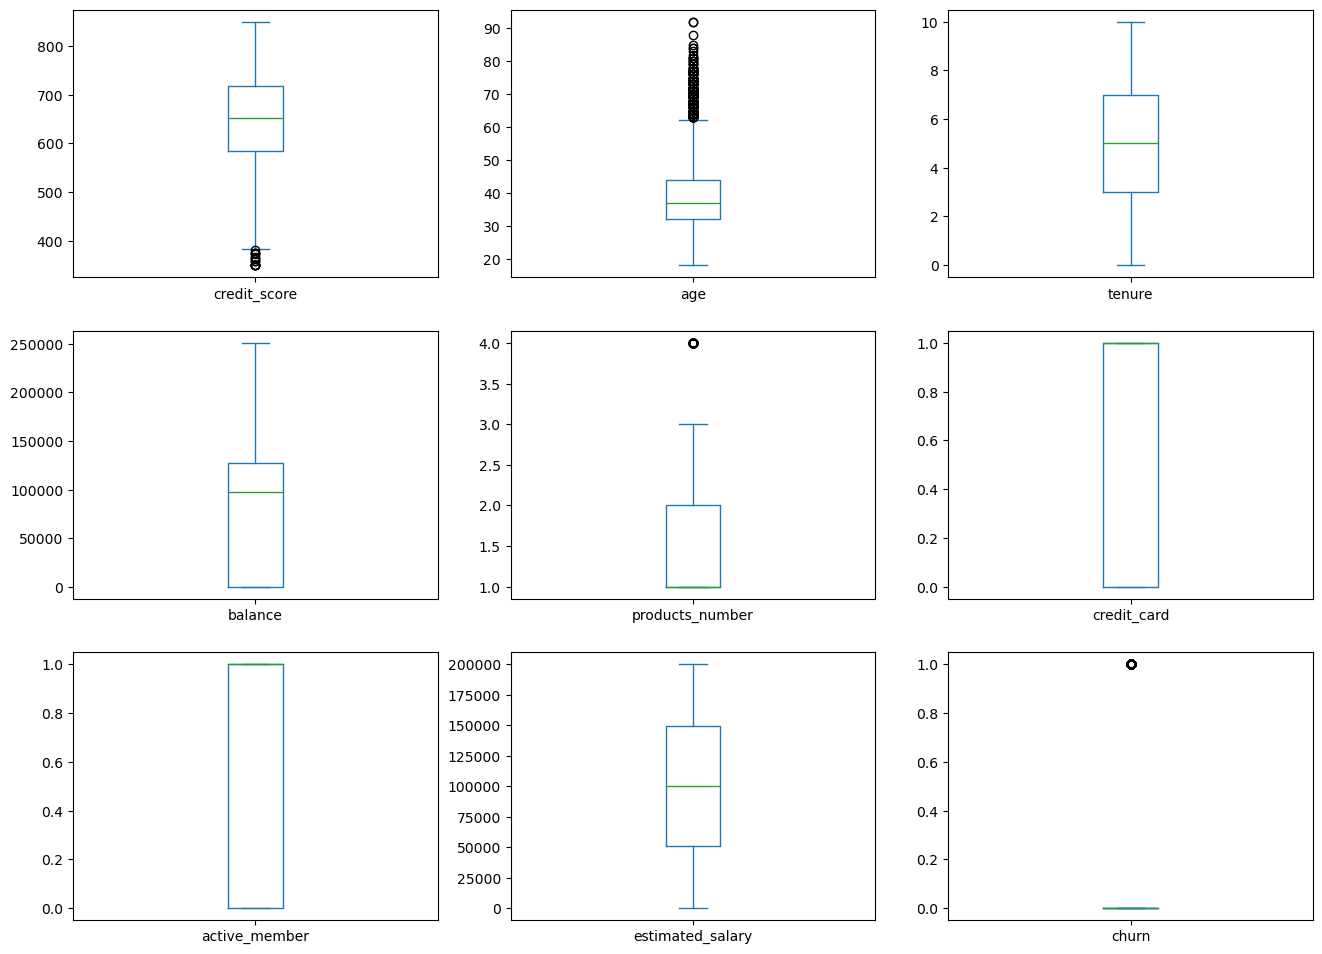

In [27]:
fig = plt.figure(figsize=(16,16))
ax = fig.gca()
df.plot(ax = ax, kind = "box", subplots=True, layout= (4,3), sharex=False)
plt.show()

In [76]:
y = df[["churn"]]
del df["churn"]

In [77]:
df = pd.get_dummies(df, columns=['gender'], prefix=['genero'])
df = pd.get_dummies(df, columns=['country'], prefix=['pais'])

In [78]:
df = pd.get_dummies(df, columns=['products_number'], prefix=['n_productos'])

In [8]:
df

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,genero_Female,genero_Male,pais_France,pais_Germany,pais_Spain,n_productos_1,n_productos_2,n_productos_3,n_productos_4
0,619,42,2,0.000,1,1,101348.880,1,0,1,0,0,1,0,0,0
1,608,41,1,83807.860,0,1,112542.580,1,0,0,0,1,1,0,0,0
2,502,42,8,159660.800,1,0,113931.570,1,0,1,0,0,0,0,1,0
3,699,39,1,0.000,0,0,93826.630,1,0,1,0,0,0,1,0,0
4,850,43,2,125510.820,1,1,79084.100,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,1,0,96270.640,0,1,1,0,0,0,1,0,0
9996,516,35,10,57369.610,1,1,101699.770,0,1,1,0,0,1,0,0,0
9997,709,36,7,0.000,0,1,42085.580,1,0,1,0,0,1,0,0,0
9998,772,42,3,75075.310,1,0,92888.520,0,1,0,1,0,0,1,0,0


In [79]:
del df["genero_Female"]
del df["pais_Spain"]
del df["n_productos_4"]

In [80]:
print(co.Counter(y))
# Estrategia de submuestreo
undersample = RandomUnderSampler(sampling_strategy=0.70)
# Ajustar y aplicar la transformación
X_under, y_under = undersample.fit_resample(df, y)

Counter({'churn': 1})


In [81]:
y_under.value_counts()

churn
0        2910
1        2037
dtype: int64

Nuestra variable a predecir esta balanceada.

In [82]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=seed)

# MODELOS

In [83]:
scoring = 'accuracy'

# Creamos algoritmos base
models = []
models.append(('LR', LogisticRegression()))
models.append(('CB', CatBoostClassifier(random_state=seed, verbose=False)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))
models.append(('SGDC', SGDClassifier(random_state=seed)))

In [28]:
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

LR: 79.04%
LR: 86.52%
LDA: 83.91%
KNN: 76.07%
CART: 79.60%
NB: 78.46%
SVM: 79.68%
SGDC: 67.22%


In [40]:
pipelines = []
pipelines.append(('ScaledLoR', Pipeline([('Scaler', RobustScaler()),('CB', LogisticRegression())])))
pipelines.append(('ScaledCB', Pipeline([('Scaler', RobustScaler()),('LR', CatBoostClassifier(random_state=seed, verbose=False))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', RobustScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaledk-NN', Pipeline([('Scaler', RobustScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', RobustScaler()),('CART', DecisionTreeClassifier(random_state=seed))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', RobustScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', RobustScaler()),('SVM', SVC(random_state=seed))])))
pipelines.append(('ScaledSGDC', Pipeline([('Scaler', RobustScaler()),('SGDC', SGDClassifier(random_state=seed))])))
results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

ScaledLoR: 84.09%
ScaledCB: 86.52%
ScaledLDA: 83.91%
Scaledk-NN: 83.24%
ScaledCART: 79.61%
ScaledNB: 83.09%
ScaledSVM: 85.56%
ScaledSGDC: 82.49%


## Transformamos nuestra data

In [84]:
rs = RobustScaler()
ajuste = rs.fit(X_train)
X_train2 = ajuste.transform(X_train)
X_test2 = ajuste.transform(X_test)

### Modificamos los hiperparametros de nuestros mejores modelos.

In [43]:
# Modificamos los Hiperparametros de CatBoost, ya que fue uno de los que nos dió mejor resultado.

iterations = np.array([100,500,1000])
learning_rate = np.array([0.01, 0.1, 0.2])
depth = np.array([4, 6, 8])
loss_function = np.array(['Logloss', 'CrossEntropy'])

param_grid = dict(iterations=iterations, learning_rate=learning_rate, depth=depth, loss_function=loss_function)

model = CatBoostClassifier(random_state=seed, verbose=False)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(X_train2, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.865375 using {'depth': 6, 'iterations': 1000, 'learning_rate': 0.01, 'loss_function': 'Logloss'}


In [89]:
CBC = CatBoostClassifier(random_state=seed, verbose=False, depth= 6, iterations= 1000, 
                         learning_rate= 0.01, loss_function= 'Logloss').fit(X_train2, y_train)
ypred_CBC = CBC.predict(X_test2)
accuracy = accuracy_score(y_test, ypred_CBC)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, ypred_CBC))

Accuracy: 86.40%
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1589
           1       0.77      0.48      0.59       411

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [26]:
# Modificamos los Hiperparametros de SVC, ya que fue uno de los que nos dió mejor resultado.

c_values = np.array([0.1,1,10,100])
kernel_values = np.array(["rbf", "linear"])
gamma = np.array(['auto','scale'])

param_grid = dict(C=c_values, kernel=kernel_values, gamma=gamma)

model = SVC(random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(X_train2, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.859125 using {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [90]:
SVC = SVC(random_state=seed, C= 100, gamma= 'auto', kernel= 'rbf').fit(X_train2, y_train)
ypred_SVC = SVC.predict(X_test2)
accuracy = accuracy_score(y_test, ypred_SVC)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, ypred_SVC))

Accuracy: 86.65%
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1589
           1       0.80      0.46      0.59       411

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [28]:
# Modificamos los Hiperparametros de KNeighborsClassifier, ya que fue uno de los que nos dió mejor resultado.

n_neighbors = np.array([3, 5, 7])
weights = np.array(['uniform', 'distance'])
p = np.array([1,2])
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])


param_grid = dict(n_neighbors=n_neighbors, weights=weights, p=p, algorithm=algorithm)

model = KNeighborsClassifier()

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(X_train2, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.837125 using {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [91]:
KNC = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 7, p= 1, weights= 'distance').fit(X_train2, y_train)
ypred_KNC = KNC.predict(X_test2)
accuracy = accuracy_score(y_test, ypred_KNC)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, ypred_KNC))

Accuracy: 84.45%
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1589
           1       0.70      0.43      0.53       411

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



# Modelos Ensamblados

In [29]:
# ensembles
seed = 7
ensembles = []
ensembles.append(('AB', AdaBoostClassifier(random_state=seed)))
ensembles.append(('GBM', GradientBoostingClassifier(random_state=seed)))
ensembles.append(('RF', RandomForestClassifier(random_state=seed)))
ensembles.append(('ET', ExtraTreesClassifier(random_state=seed)))
ensembles.append(('BGD', BaggingClassifier(base_estimator= CatBoostClassifier(random_state=seed, verbose=False), random_state=seed)))
results = []
names = []
for name, model in ensembles:
    cv_results = cross_val_score(model, X_train, y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

AB: 85.30%
GBM: 86.26%
RF: 85.96%
ET: 84.92%
BGD: 86.29%


In [30]:
pipelines = []
pipelines.append(('RBS AB', Pipeline([('Scaler', RobustScaler()),('AB', AdaBoostClassifier(random_state=seed))])))
pipelines.append(('RBS GBM', Pipeline([('Scaler', RobustScaler()),('GBM', GradientBoostingClassifier(random_state=seed))])))
pipelines.append(('RBS RF', Pipeline([('Scaler', RobustScaler()),('RF', RandomForestClassifier(random_state=seed))])))
pipelines.append(('RBS ET', Pipeline([('Scaler', RobustScaler()),('ET', ExtraTreesClassifier(random_state=seed))])))
pipelines.append(('RBS BGD', Pipeline([('Scaler', RobustScaler()),('BGD', BaggingClassifier(base_estimator= CatBoostClassifier(random_state=seed, verbose=False), random_state=seed))])))
results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

RBS AB: 85.30%
RBS GBM: 86.26%
RBS RF: 85.97%
RBS ET: 84.89%
RBS BGD: 86.29%


In [16]:
# Modificando Hiperparametro de GradientBoostingRegressor

k_values = np.array([150,200,250,300,350])
loss = np.array(["log_loss", "deviance", "exponential"])
max_features = np.array([ "auto", "sqrt" ])

param_grid = dict(loss = loss, n_estimators=k_values, criterion=criterion)

model = GradientBoostingClassifier(random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(X_train2, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}") 

Best: 0.8633749999999999 using {'criterion': 'friedman_mse', 'loss': 'exponential', 'n_estimators': 300}


In [92]:
GBC = GradientBoostingClassifier(criterion= 'friedman_mse', loss= 'exponential', 
                                 n_estimators= 300, random_state=seed).fit(X_train2, y_train)
ypred_GBC = GBC.predict(X_test2)
accuracy = accuracy_score(y_test, ypred_GBC)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, ypred_GBC))

Accuracy: 86.65%
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1589
           1       0.77      0.50      0.61       411

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



## XGBOOST

In [59]:
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'max_delta_step': trial.suggest_loguniform('max_delta_step', 1, 6),
        'min_child_weight': trial.suggest_loguniform('max_delta_step', 1, 2),
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train2, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test2)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [60]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2023-07-26 19:35:49,639] A new study created in memory with name: no-name-0274e736-021c-4f31-bc9b-1162afd70322
[I 2023-07-26 19:35:51,524] Trial 0 finished with value: 0.8595 and parameters: {'max_depth': 3, 'learning_rate': 0.03714186827473706, 'n_estimators': 583, 'min_child_weight': 5, 'gamma': 5.071349245400297e-07, 'eta': 0.07665353406090687, 'subsample': 0.34416245937009643, 'colsample_bytree': 0.3475977674621736, 'reg_alpha': 6.054873925471139e-07, 'reg_lambda': 0.0006309705124388512, 'max_delta_step': 3.812376200237803}. Best is trial 0 with value: 0.8595.
[I 2023-07-26 19:35:57,379] Trial 1 finished with value: 0.8555 and parameters: {'max_depth': 5, 'learning_rate': 0.103486768623093, 'n_estimators': 1627, 'min_child_weight': 5, 'gamma': 0.0011900732890366913, 'eta': 0.055801192985931385, 'subsample': 0.2449380990367545, 'colsample_bytree': 0.2612640363677903, 'reg_alpha': 1.0838555596856615e-05, 'reg_lambda': 6.343960074066984e-06, 'max_delta_step': 3.9719123958937685}. B

[I 2023-07-26 19:36:47,861] Trial 18 finished with value: 0.8595 and parameters: {'max_depth': 7, 'learning_rate': 0.034888056486230605, 'n_estimators': 774, 'min_child_weight': 3, 'gamma': 9.01376695532524e-08, 'eta': 1.8727021638449175e-06, 'subsample': 0.544813892452269, 'colsample_bytree': 0.3864551711546456, 'reg_alpha': 1.7449396114551766e-08, 'reg_lambda': 0.016455067803853748, 'max_delta_step': 3.401468417867184}. Best is trial 15 with value: 0.8605.
[I 2023-07-26 19:36:50,182] Trial 19 finished with value: 0.845 and parameters: {'max_depth': 3, 'learning_rate': 0.015541036193636452, 'n_estimators': 1007, 'min_child_weight': 6, 'gamma': 8.785428577245295e-06, 'eta': 5.4923126541691536e-05, 'subsample': 0.2615205292285353, 'colsample_bytree': 0.14559072856441233, 'reg_alpha': 1.8947669612505455e-07, 'reg_lambda': 0.0004380644126724729, 'max_delta_step': 4.619186389287883}. Best is trial 15 with value: 0.8605.
[I 2023-07-26 19:36:51,670] Trial 20 finished with value: 0.858 and pa

[I 2023-07-26 19:37:49,450] Trial 36 finished with value: 0.863 and parameters: {'max_depth': 5, 'learning_rate': 0.010455200038492249, 'n_estimators': 118, 'min_child_weight': 1, 'gamma': 4.962827182565439e-06, 'eta': 0.00014889997576448999, 'subsample': 0.59418719200724, 'colsample_bytree': 0.7276306356231171, 'reg_alpha': 3.4662052725193365e-08, 'reg_lambda': 0.0003959274289595106, 'max_delta_step': 1.7731585046535656}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:37:51,202] Trial 37 finished with value: 0.851 and parameters: {'max_depth': 6, 'learning_rate': 0.016072825490377193, 'n_estimators': 301, 'min_child_weight': 2, 'gamma': 0.0001902225189099211, 'eta': 0.0005920383175176903, 'subsample': 0.4206792731426865, 'colsample_bytree': 0.2786092382648017, 'reg_alpha': 3.9526916020276735e-06, 'reg_lambda': 0.00021615390790015926, 'max_delta_step': 2.3502661280140966}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:37:55,313] Trial 38 finished with value: 0.8625 and param

[I 2023-07-26 19:39:20,089] Trial 54 finished with value: 0.867 and parameters: {'max_depth': 9, 'learning_rate': 0.012340956545812175, 'n_estimators': 552, 'min_child_weight': 1, 'gamma': 5.930920606418124e-06, 'eta': 0.00036637178098298807, 'subsample': 0.9987573836349865, 'colsample_bytree': 0.5725614347823873, 'reg_alpha': 3.093415960803184e-08, 'reg_lambda': 0.0033767240459379633, 'max_delta_step': 2.742663803974531}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:39:24,599] Trial 55 finished with value: 0.859 and parameters: {'max_depth': 10, 'learning_rate': 0.015355777263450174, 'n_estimators': 428, 'min_child_weight': 1, 'gamma': 9.461636926274354e-06, 'eta': 0.0026410313458222227, 'subsample': 0.8422065627325745, 'colsample_bytree': 0.32232707124796667, 'reg_alpha': 6.229134132399139e-07, 'reg_lambda': 0.0004169217099216916, 'max_delta_step': 2.0441583069765965}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:39:31,882] Trial 56 finished with value: 0.861 and parame

[I 2023-07-26 19:40:50,284] Trial 72 finished with value: 0.8655 and parameters: {'max_depth': 9, 'learning_rate': 0.01180264390366267, 'n_estimators': 401, 'min_child_weight': 2, 'gamma': 2.1385014198623162e-05, 'eta': 0.000863648823832157, 'subsample': 0.7042062124635452, 'colsample_bytree': 0.5390512650262201, 'reg_alpha': 5.4245304531003166e-08, 'reg_lambda': 0.004976456743941881, 'max_delta_step': 2.474526412107443}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:40:57,829] Trial 73 finished with value: 0.8655 and parameters: {'max_depth': 8, 'learning_rate': 0.018824916487776767, 'n_estimators': 658, 'min_child_weight': 1, 'gamma': 9.989339755548913e-07, 'eta': 8.356735359876578e-05, 'subsample': 0.9127100019954376, 'colsample_bytree': 0.7568018856421148, 'reg_alpha': 1.464534039630697e-08, 'reg_lambda': 0.0027004175699165893, 'max_delta_step': 3.2554691839163725}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:41:13,743] Trial 74 finished with value: 0.86 and parameter

[I 2023-07-26 19:42:20,712] Trial 90 finished with value: 0.8535 and parameters: {'max_depth': 8, 'learning_rate': 0.012811001146047479, 'n_estimators': 967, 'min_child_weight': 5, 'gamma': 3.692753065201745e-06, 'eta': 0.00010242097082164338, 'subsample': 0.8945851766132302, 'colsample_bytree': 0.2969901285199059, 'reg_alpha': 2.397692000487615e-07, 'reg_lambda': 7.07544250301672e-05, 'max_delta_step': 2.4546110783094184}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:42:22,870] Trial 91 finished with value: 0.862 and parameters: {'max_depth': 7, 'learning_rate': 0.019927624875034505, 'n_estimators': 201, 'min_child_weight': 2, 'gamma': 2.556800479142088e-06, 'eta': 4.4841284631041135e-05, 'subsample': 0.7214468376642026, 'colsample_bytree': 0.6666420486444324, 'reg_alpha': 1.180852016352064e-06, 'reg_lambda': 0.0012415749764787464, 'max_delta_step': 2.2883867574475576}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:42:26,130] Trial 92 finished with value: 0.8625 and param

[I 2023-07-26 19:43:32,180] Trial 108 finished with value: 0.86 and parameters: {'max_depth': 8, 'learning_rate': 0.010249573273751167, 'n_estimators': 412, 'min_child_weight': 2, 'gamma': 3.039285644787852e-06, 'eta': 0.00014351109608909103, 'subsample': 0.997450089776975, 'colsample_bytree': 0.9321567775479, 'reg_alpha': 2.896130937103385e-07, 'reg_lambda': 0.0049906320430377505, 'max_delta_step': 2.560277410416092}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:43:35,820] Trial 109 finished with value: 0.868 and parameters: {'max_depth': 7, 'learning_rate': 0.019014267624954003, 'n_estimators': 333, 'min_child_weight': 1, 'gamma': 8.62264457756686e-07, 'eta': 0.0008796649943425313, 'subsample': 0.8434391941448842, 'colsample_bytree': 0.663625734018017, 'reg_alpha': 1.2100916794209306e-07, 'reg_lambda': 0.002171617944226549, 'max_delta_step': 2.337285362717948}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:43:38,700] Trial 110 finished with value: 0.8645 and parameters: 

[I 2023-07-26 19:44:32,555] Trial 126 finished with value: 0.8645 and parameters: {'max_depth': 4, 'learning_rate': 0.03021687711563405, 'n_estimators': 445, 'min_child_weight': 5, 'gamma': 0.00025717689431082333, 'eta': 0.02113361787297672, 'subsample': 0.9997701187932702, 'colsample_bytree': 0.6990805348698378, 'reg_alpha': 2.267805312224611e-07, 'reg_lambda': 0.0021218926719069123, 'max_delta_step': 2.271007985191156}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:44:34,277] Trial 127 finished with value: 0.8655 and parameters: {'max_depth': 8, 'learning_rate': 0.03412209630953009, 'n_estimators': 144, 'min_child_weight': 7, 'gamma': 6.979800960778889e-05, 'eta': 0.0020224497458971626, 'subsample': 0.7242530954639586, 'colsample_bytree': 0.5946667921104432, 'reg_alpha': 3.8283085669714584e-07, 'reg_lambda': 0.00282698584016987, 'max_delta_step': 3.0748814967960976}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:44:37,501] Trial 128 finished with value: 0.8625 and paramet

[I 2023-07-26 19:45:46,621] Trial 144 finished with value: 0.863 and parameters: {'max_depth': 9, 'learning_rate': 0.019760201935734856, 'n_estimators': 321, 'min_child_weight': 7, 'gamma': 6.5036969192982475e-06, 'eta': 0.004443369378711151, 'subsample': 0.9101944845470741, 'colsample_bytree': 0.5326220443134551, 'reg_alpha': 1.3809323026798445e-07, 'reg_lambda': 0.00040022333768508574, 'max_delta_step': 2.297847391339921}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:45:48,845] Trial 145 finished with value: 0.868 and parameters: {'max_depth': 8, 'learning_rate': 0.024709461091984856, 'n_estimators': 291, 'min_child_weight': 7, 'gamma': 0.0002462481464999706, 'eta': 0.00047561651037157, 'subsample': 0.18253189218719182, 'colsample_bytree': 0.8071336712812527, 'reg_alpha': 3.8458601308736305e-07, 'reg_lambda': 0.001124546160694176, 'max_delta_step': 2.525974535926787}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:45:50,320] Trial 146 finished with value: 0.863 and parame

[I 2023-07-26 19:46:38,440] Trial 162 finished with value: 0.8675 and parameters: {'max_depth': 7, 'learning_rate': 0.023446668788126967, 'n_estimators': 333, 'min_child_weight': 7, 'gamma': 8.533845101644534e-05, 'eta': 0.003692282832039562, 'subsample': 0.7292295931554801, 'colsample_bytree': 0.4886589084430317, 'reg_alpha': 5.2820735875814e-08, 'reg_lambda': 0.0012565131041204396, 'max_delta_step': 2.533309749388524}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:46:41,047] Trial 163 finished with value: 0.862 and parameters: {'max_depth': 8, 'learning_rate': 0.034505222989685794, 'n_estimators': 370, 'min_child_weight': 6, 'gamma': 9.246810275937058e-05, 'eta': 0.008470645350653155, 'subsample': 0.20807707319842306, 'colsample_bytree': 0.612242962105955, 'reg_alpha': 2.4077618006051878e-08, 'reg_lambda': 0.0024094975945069255, 'max_delta_step': 2.6921554578763205}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:46:44,410] Trial 164 finished with value: 0.867 and paramete

[I 2023-07-26 19:47:38,434] Trial 180 finished with value: 0.867 and parameters: {'max_depth': 7, 'learning_rate': 0.02669880645677929, 'n_estimators': 168, 'min_child_weight': 1, 'gamma': 7.366788001227456e-05, 'eta': 0.009142846701921606, 'subsample': 0.7752210991907558, 'colsample_bytree': 0.6762193446334118, 'reg_alpha': 1.3822847643490077e-07, 'reg_lambda': 0.0020411338677937163, 'max_delta_step': 2.3437126481359467}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:47:41,359] Trial 181 finished with value: 0.8685 and parameters: {'max_depth': 7, 'learning_rate': 0.023324663936782654, 'n_estimators': 315, 'min_child_weight': 7, 'gamma': 8.421961309043054e-05, 'eta': 0.004206527530051052, 'subsample': 0.7086332424734978, 'colsample_bytree': 0.4829509627757892, 'reg_alpha': 5.2210545610307575e-08, 'reg_lambda': 0.0013576989176729455, 'max_delta_step': 2.5347161265588745}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:47:44,309] Trial 182 finished with value: 0.861 and param

[I 2023-07-26 19:48:33,545] Trial 198 finished with value: 0.8545 and parameters: {'max_depth': 7, 'learning_rate': 0.016615399639821636, 'n_estimators': 244, 'min_child_weight': 1, 'gamma': 1.8105857488986165e-05, 'eta': 0.00031973019264906137, 'subsample': 0.3422568701418167, 'colsample_bytree': 0.34711597746596345, 'reg_alpha': 5.6020868835418326e-08, 'reg_lambda': 0.0027917560773577208, 'max_delta_step': 2.1839512735588946}. Best is trial 25 with value: 0.87.
[I 2023-07-26 19:48:35,078] Trial 199 finished with value: 0.862 and parameters: {'max_depth': 9, 'learning_rate': 0.011086601172912965, 'n_estimators': 195, 'min_child_weight': 7, 'gamma': 8.334139482320104e-05, 'eta': 4.8677575879450844e-05, 'subsample': 0.14707057493941508, 'colsample_bytree': 0.5810022037163396, 'reg_alpha': 1.129132757327549e-06, 'reg_lambda': 0.0008332700282775859, 'max_delta_step': 2.72115096450554}. Best is trial 25 with value: 0.87.


In [61]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 200
Best trial:
  Value: 0.87
  Params: 
    max_depth: 8
    learning_rate: 0.010086583419139783
    n_estimators: 338
    min_child_weight: 1
    gamma: 2.4552795153886973e-05
    eta: 2.785342870149903e-05
    subsample: 0.8932488770428629
    colsample_bytree: 0.7190114929724998
    reg_alpha: 6.536191429942024e-08
    reg_lambda: 0.0021884123617698886
    max_delta_step: 2.087961685002922


In [62]:
params = trial.params
model = XGBClassifier(**params)
model.fit(X_train2, y_train)
y_pred = model.predict(X_test2)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred))

Accuracy after tuning: 86.65%
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1589
           1       0.80      0.47      0.59       411

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



## Redes Neuronales

In [87]:
# Construir el modelo de Red Neuronal Feedforward (DNN)
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.L2(0.01) ),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train2, y_train, validation_data=(X_test2, y_test), epochs=1000, batch_size=32)

# Evaluar el modelo en el conjunto de prueba
_, accuracy = model.evaluate(X_test2, y_test)
print("Accuracy en el conjunto de prueba:", accuracy)

# Hacer predicciones en el conjunto de prueba
y_pred_prob = model.predict(X_test2)
y_pred = np.round(y_pred_prob).flatten()

print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Epoch 1/1000
250/250 [==============================] - 4s 7ms/step - loss: 0.6358 - accuracy: 0.7803 - val_loss: 0.5001 - val_accuracy: 0.8095
Epoch 2/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.4853 - accuracy: 0.8075 - val_loss: 0.4352 - val_accuracy: 0.8410
Epoch 3/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.4370 - accuracy: 0.8260 - val_loss: 0.3997 - val_accuracy: 0.8450
Epoch 4/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.4115 - accuracy: 0.8407 - val_loss: 0.3855 - val_accuracy: 0.8445
Epoch 5/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3924 - accuracy: 0.8497 - val_loss: 0.3775 - val_accuracy: 0.8535
Epoch 6/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3943 - accuracy: 0.8449 - val_loss: 0.3711 - val_accuracy: 0.8520
Epoch 7/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3878 - accuracy: 0.8510 - val_loss: 0.3691 - val_accuracy:

250/250 [==============================] - 1s 5ms/step - loss: 0.3648 - accuracy: 0.8554 - val_loss: 0.3539 - val_accuracy: 0.8645
Epoch 114/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3619 - accuracy: 0.8580 - val_loss: 0.3542 - val_accuracy: 0.8580
Epoch 115/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3647 - accuracy: 0.8584 - val_loss: 0.3502 - val_accuracy: 0.8620
Epoch 116/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3602 - accuracy: 0.8585 - val_loss: 0.3534 - val_accuracy: 0.8560
Epoch 117/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3598 - accuracy: 0.8579 - val_loss: 0.3549 - val_accuracy: 0.8590
Epoch 118/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3650 - accuracy: 0.8575 - val_loss: 0.3543 - val_accuracy: 0.8550
Epoch 119/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3664 - accuracy: 0.8539 - val_loss: 0.3548 - val_accuracy: 

250/250 [==============================] - 1s 5ms/step - loss: 0.3628 - accuracy: 0.8577 - val_loss: 0.3461 - val_accuracy: 0.8615
Epoch 226/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3634 - accuracy: 0.8558 - val_loss: 0.3483 - val_accuracy: 0.8605
Epoch 227/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3605 - accuracy: 0.8579 - val_loss: 0.3489 - val_accuracy: 0.8590
Epoch 228/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3634 - accuracy: 0.8600 - val_loss: 0.3544 - val_accuracy: 0.8555
Epoch 229/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3653 - accuracy: 0.8564 - val_loss: 0.3506 - val_accuracy: 0.8620
Epoch 230/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3602 - accuracy: 0.8583 - val_loss: 0.3505 - val_accuracy: 0.8600
Epoch 231/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3630 - accuracy: 0.8554 - val_loss: 0.3526 - val_accuracy: 

250/250 [==============================] - 1s 5ms/step - loss: 0.3649 - accuracy: 0.8545 - val_loss: 0.3493 - val_accuracy: 0.8580
Epoch 338/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3595 - accuracy: 0.8576 - val_loss: 0.3469 - val_accuracy: 0.8590
Epoch 339/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3615 - accuracy: 0.8575 - val_loss: 0.3489 - val_accuracy: 0.8660
Epoch 340/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3601 - accuracy: 0.8561 - val_loss: 0.3531 - val_accuracy: 0.8570
Epoch 341/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3635 - accuracy: 0.8583 - val_loss: 0.3526 - val_accuracy: 0.8555
Epoch 342/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3637 - accuracy: 0.8558 - val_loss: 0.3482 - val_accuracy: 0.8595
Epoch 343/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3597 - accuracy: 0.8590 - val_loss: 0.3539 - val_accuracy: 

250/250 [==============================] - 1s 5ms/step - loss: 0.3600 - accuracy: 0.8577 - val_loss: 0.3513 - val_accuracy: 0.8545
Epoch 450/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3605 - accuracy: 0.8570 - val_loss: 0.3538 - val_accuracy: 0.8540
Epoch 451/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3620 - accuracy: 0.8589 - val_loss: 0.3520 - val_accuracy: 0.8585
Epoch 452/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3617 - accuracy: 0.8559 - val_loss: 0.3493 - val_accuracy: 0.8605
Epoch 453/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3602 - accuracy: 0.8594 - val_loss: 0.3488 - val_accuracy: 0.8595
Epoch 454/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3612 - accuracy: 0.8576 - val_loss: 0.3458 - val_accuracy: 0.8660
Epoch 455/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3649 - accuracy: 0.8569 - val_loss: 0.3512 - val_accuracy: 

250/250 [==============================] - 1s 5ms/step - loss: 0.3602 - accuracy: 0.8585 - val_loss: 0.3554 - val_accuracy: 0.8615
Epoch 562/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3652 - accuracy: 0.8540 - val_loss: 0.3510 - val_accuracy: 0.8525
Epoch 563/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3592 - accuracy: 0.8591 - val_loss: 0.3533 - val_accuracy: 0.8580
Epoch 564/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3632 - accuracy: 0.8569 - val_loss: 0.3538 - val_accuracy: 0.8585
Epoch 565/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3582 - accuracy: 0.8594 - val_loss: 0.3508 - val_accuracy: 0.8555
Epoch 566/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3605 - accuracy: 0.8590 - val_loss: 0.3490 - val_accuracy: 0.8610
Epoch 567/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3619 - accuracy: 0.8585 - val_loss: 0.3498 - val_accuracy: 

250/250 [==============================] - 1s 5ms/step - loss: 0.3658 - accuracy: 0.8550 - val_loss: 0.3478 - val_accuracy: 0.8595
Epoch 674/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3653 - accuracy: 0.8547 - val_loss: 0.3499 - val_accuracy: 0.8580
Epoch 675/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3638 - accuracy: 0.8545 - val_loss: 0.3506 - val_accuracy: 0.8585
Epoch 676/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3603 - accuracy: 0.8579 - val_loss: 0.3507 - val_accuracy: 0.8580
Epoch 677/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3612 - accuracy: 0.8581 - val_loss: 0.3508 - val_accuracy: 0.8575
Epoch 678/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3624 - accuracy: 0.8554 - val_loss: 0.3489 - val_accuracy: 0.8650
Epoch 679/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3633 - accuracy: 0.8534 - val_loss: 0.3535 - val_accuracy: 

250/250 [==============================] - 1s 5ms/step - loss: 0.3607 - accuracy: 0.8576 - val_loss: 0.3495 - val_accuracy: 0.8590
Epoch 786/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3626 - accuracy: 0.8568 - val_loss: 0.3528 - val_accuracy: 0.8595
Epoch 787/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3619 - accuracy: 0.8574 - val_loss: 0.3454 - val_accuracy: 0.8610
Epoch 788/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3587 - accuracy: 0.8621 - val_loss: 0.3460 - val_accuracy: 0.8620
Epoch 789/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3642 - accuracy: 0.8584 - val_loss: 0.3477 - val_accuracy: 0.8610
Epoch 790/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3606 - accuracy: 0.8558 - val_loss: 0.3510 - val_accuracy: 0.8550
Epoch 791/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3632 - accuracy: 0.8547 - val_loss: 0.3539 - val_accuracy: 

250/250 [==============================] - 1s 5ms/step - loss: 0.3614 - accuracy: 0.8562 - val_loss: 0.3524 - val_accuracy: 0.8550
Epoch 898/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3674 - accuracy: 0.8571 - val_loss: 0.3509 - val_accuracy: 0.8590
Epoch 899/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3625 - accuracy: 0.8569 - val_loss: 0.3542 - val_accuracy: 0.8580
Epoch 900/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3636 - accuracy: 0.8555 - val_loss: 0.3505 - val_accuracy: 0.8595
Epoch 901/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3586 - accuracy: 0.8609 - val_loss: 0.3467 - val_accuracy: 0.8630
Epoch 902/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3621 - accuracy: 0.8550 - val_loss: 0.3525 - val_accuracy: 0.8630
Epoch 903/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.3625 - accuracy: 0.8605 - val_loss: 0.3468 - val_accuracy: 

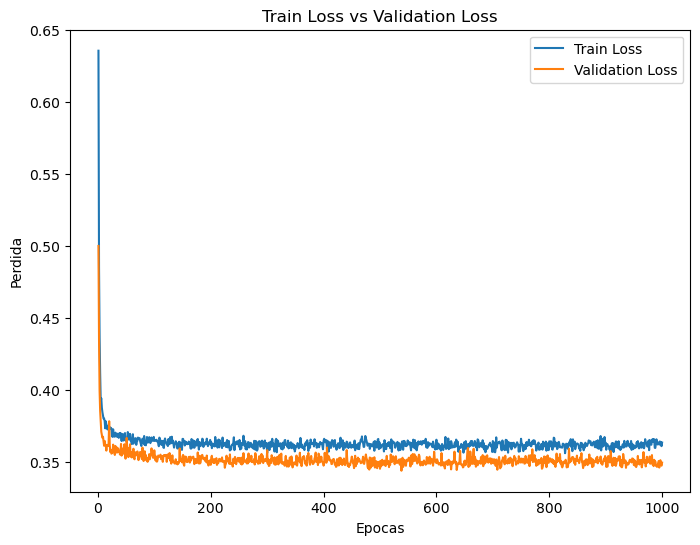

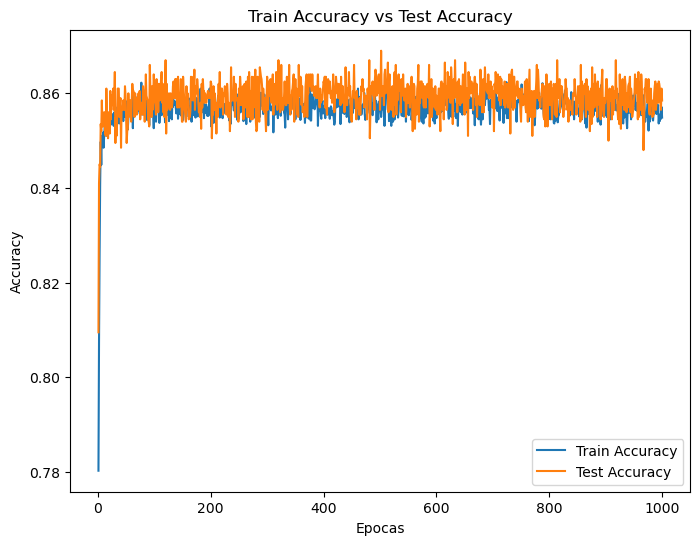

In [88]:
# Obtener las métricas del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Crear una gráfica para el Loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.title('Train Loss vs Validation Loss')
plt.show()

# Crear una gráfica para el Accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test Accuracy')
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train Accuracy vs Test Accuracy')
plt.show()

# Elegimos los modelos como XGBoost, SVC y GradientBoostingClassifier, el cual obtenemos un Accuracy del 86.65%.